<a href="https://colab.research.google.com/github/BhojRajBist/BhojRajBist/blob/main/rasterio_basics.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install rasterio

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 22.2/22.2 MB 75.0 MB/s eta 0:00:00


In [ ]:
import rasterio

raster_path = '/content/20230101000000_AHI_ANU_LSTv1.4.1_AusSubset.cog.tif'
with rasterio.open(raster_path) as src:
    print(src.profile)


{'driver': 'GTiff', 'dtype': 'float32', 'nodata': -3.3999999521443642e+38, 'width': 2100, 'height': 1750, 'count': 1, 'crs': CRS.from_wkt('GEOGCS["WGS 84",DATUM["WGS_1984",SPHEROID["WGS 84",6378137,298.257223563,AUTHORITY["EPSG","7030"]],AUTHORITY["EPSG","6326"]],PRIMEM["Greenwich",0,AUTHORITY["EPSG","8901"]],UNIT["degree",0.0174532925199433,AUTHORITY["EPSG","9122"]],AXIS["Latitude",NORTH],AXIS["Longitude",EAST],AUTHORITY["EPSG","4326"]]'), 'transform': Affine(0.02, 0.0, 112.0,
       0.0, -0.02, -10.0), 'blockxsize': 512, 'blockysize': 512, 'tiled': True, 'compress': 'deflate', 'interleave': 'band'}


In [ ]:
with rasterio.open(raster_path) as src:
  band1 = src.read(1)
  print(band1.shape)


(1750, 2100)


In [ ]:
with rasterio.open(raster_path) as src:
  band2= src.read(1)
  print(band2.shape)
  print(band2.min())
  print(band2.max())

(1750, 2100)
-3.4e+38
325.27036


In [ ]:
with rasterio.open(raster_path) as src:
    band1 = src.read(1)
    print(band1)

[[-3.4e+38 -3.4e+38 -3.4e+38 ... -3.4e+38 -3.4e+38 -3.4e+38]
 [-3.4e+38 -3.4e+38 -3.4e+38 ... -3.4e+38 -3.4e+38 -3.4e+38]
 [-3.4e+38 -3.4e+38 -3.4e+38 ... -3.4e+38 -3.4e+38 -3.4e+38]
 ...
 [-3.4e+38 -3.4e+38 -3.4e+38 ... -3.4e+38 -3.4e+38 -3.4e+38]
 [-3.4e+38 -3.4e+38 -3.4e+38 ... -3.4e+38 -3.4e+38 -3.4e+38]
 [-3.4e+38 -3.4e+38 -3.4e+38 ... -3.4e+38 -3.4e+38 -3.4e+38]]


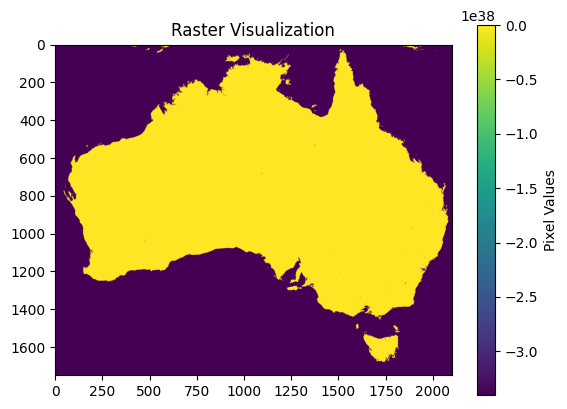

In [ ]:
import matplotlib.pyplot as plt

with rasterio.open(raster_path) as src:
    band1 = src.read(1)

plt.imshow(band1, cmap='viridis')
plt.colorbar(label='Pixel Values')
plt.title('Raster Visualization')
plt.show()


In [ ]:
with rasterio.open(raster_path) as src:
    print("CRS:", src.crs)  # Coordinate Reference System
    print("Bounds:", src.bounds)  # Geographical bounds
    print("Resolution:", src.res)  # Resolution of each pixel


CRS: EPSG:4326
Bounds: BoundingBox(left=112.0, bottom=-45.0, right=154.0, top=-10.0)
Resolution: (0.02, 0.02)


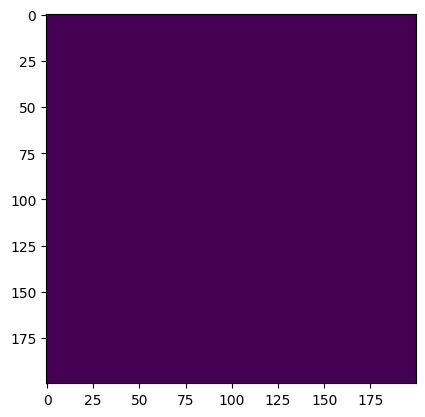

In [ ]:
from rasterio.windows import Window

# Define window (pixel bounds: col_off, row_off, width, height)
window = Window(100, 100, 200, 200)

with rasterio.open(raster_path) as src:
    cropped_data = src.read(1, window=window)

plt.imshow(cropped_data, cmap='viridis')
plt.show()


In [ ]:
from rasterio.warp import calculate_default_transform, reproject, Resampling

dst_crs = 'EPSG:4326'  # WGS84
output_file = 'reprojected.tif'

with rasterio.open(raster_path) as src:
    transform, width, height = calculate_default_transform(
        src.crs, dst_crs, src.width, src.height, *src.bounds)
    kwargs = src.meta.copy()
    kwargs.update({
        'crs': dst_crs,
        'transform': transform,
        'width': width,
        'height': height
    })

    with rasterio.open(output_file, 'w', **kwargs) as dst:
        for i in range(1, src.count + 1):
            reproject(
                source=rasterio.band(src, i),
                destination=rasterio.band(dst, i),
                src_transform=src.transform,
                src_crs=src.crs,
                dst_transform=transform,
                dst_crs=dst_crs,
                resampling=Resampling.nearest)


In [ ]:
import rasterio

resample_raster_path = '/content/reprojected.tif'
with rasterio.open(resample_raster_path) as src:
    print(src.profile)


{'driver': 'GTiff', 'dtype': 'float32', 'nodata': -3.3999999521443642e+38, 'width': 2100, 'height': 1750, 'count': 1, 'crs': CRS.from_wkt('GEOGCS["WGS 84",DATUM["WGS_1984",SPHEROID["WGS 84",6378137,298.257223563,AUTHORITY["EPSG","7030"]],AUTHORITY["EPSG","6326"]],PRIMEM["Greenwich",0,AUTHORITY["EPSG","8901"]],UNIT["degree",0.0174532925199433,AUTHORITY["EPSG","9122"]],AXIS["Latitude",NORTH],AXIS["Longitude",EAST],AUTHORITY["EPSG","4326"]]'), 'transform': Affine(0.02, 0.0, 112.0,
       0.0, -0.02, -10.0), 'blockxsize': 2100, 'blockysize': 1, 'tiled': False, 'interleave': 'band'}


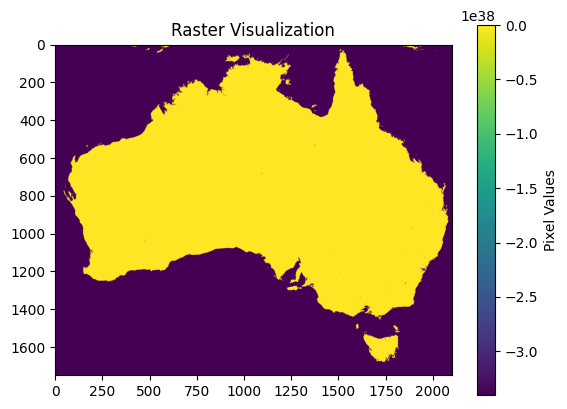

In [ ]:
import matplotlib.pyplot as plt

with rasterio.open(resample_raster_path) as src:
    band1 = src.read(1)

plt.imshow(band1, cmap='viridis')
plt.colorbar(label='Pixel Values')
plt.title('Raster Visualization')
plt.show()

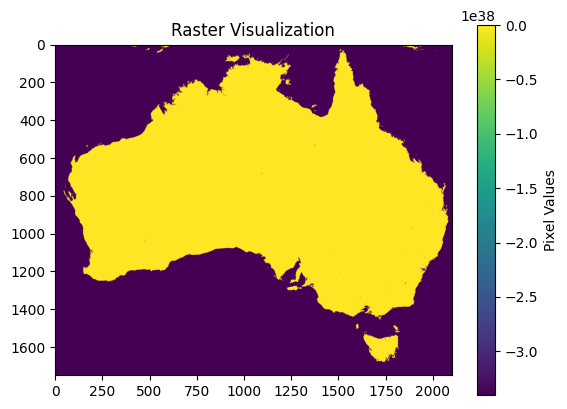

In [ ]:

import rasterio

import matplotlib.pyplot as plt

with rasterio.open('/content/20230101000000_AHI_ANU_LSTv1.4.1_AusSubset.cog.tif') as src:
    band1 = src.read(1)

plt.imshow(band1, cmap='viridis')
plt.colorbar(label='Pixel Values')
plt.title('Raster Visualization')
plt.show()

In [ ]:
with rasterio.open('/content/20230101000000_AHI_ANU_LSTv1.4.1_AusSubset.cog.tif') as src:
    print("Driver:", src.driver)  # File format driver
    print("Dimensions (Width x Height):", src.width, "x", src.height)
    print("Number of Bands:", src.count)
    print("Transform Matrix:", src.transform)  # Maps pixel to geographic coordinates
    print("NoData Value:", src.nodatavals)  # Values used for no-data pixels


Driver: GTiff
Dimensions (Width x Height): 2100 x 1750
Number of Bands: 1
Transform Matrix: | 0.02, 0.00, 112.00|
| 0.00,-0.02,-10.00|
| 0.00, 0.00, 1.00|
NoData Value: (-3.3999999521443642e+38,)


In [ ]:
from rasterio.enums import Resampling

# Open the raster and resample it
with rasterio.open('/content/20230101000000_AHI_ANU_LSTv1.4.1_AusSubset.cog.tif') as src:
    data = src.read(
        out_shape=(
            src.count,
            int(src.height / 2),  # New height (half the original)
            int(src.width / 2)    # New width (half the original)
        ),
        resampling=Resampling.bilinear
    )
    transform = src.transform * src.transform.scale(
        (src.width / data.shape[-1]),
        (src.height / data.shape[-2])
    )

print("New Transform Matrix:", transform)


New Transform Matrix: | 0.04, 0.00, 112.00|
| 0.00,-0.04,-10.00|
| 0.00, 0.00, 1.00|


In [ ]:
import numpy as np

with rasterio.open('/content/20230101000000_AHI_ANU_LSTv1.4.1_AusSubset.cog.tif') as src:
    data = src.read(1)  # Read the first band
    data = data[data != src.nodata]  # Exclude NoData values

    stats = {
        'mean': np.mean(data),
        'median': np.median(data),
        'std_dev': np.std(data),
        'min': np.min(data),
        'max': np.max(data)
    }

print("Raster Statistics:", stats)


Raster Statistics: {'mean': 293.14957, 'median': 301.53848, 'std_dev': 22.56763, 'min': 243.92932, 'max': 325.27036}


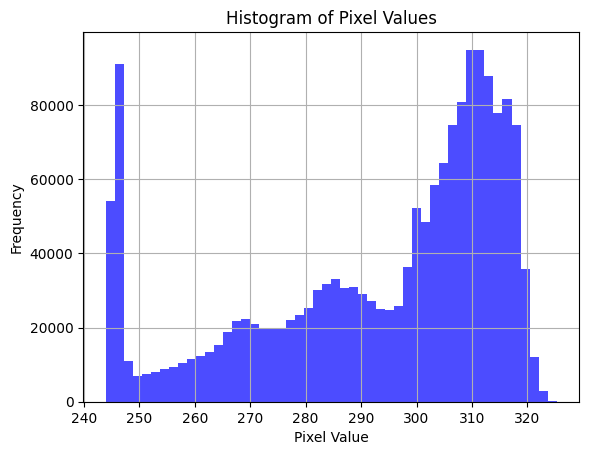

In [ ]:
import matplotlib.pyplot as plt

with rasterio.open('/content/20230101000000_AHI_ANU_LSTv1.4.1_AusSubset.cog.tif') as src:
    data = src.read(1)
    data = data[data != src.nodata]

plt.hist(data.ravel(), bins=50, color='blue', alpha=0.7)
plt.title('Histogram of Pixel Values')
plt.xlabel('Pixel Value')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()


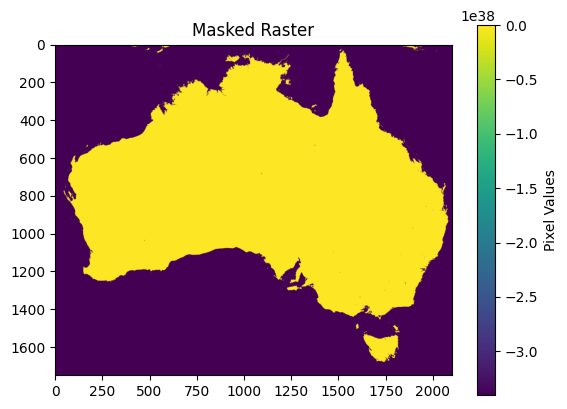

In [ ]:
with rasterio.open('/content/20230101000000_AHI_ANU_LSTv1.4.1_AusSubset.cog.tif') as src:
    data = src.read(1)
    nodata = src.nodata

    # Apply a custom mask (e.g., mask values less than 50)
    mask = data < 50
    masked_data = np.where(mask, nodata, data)

# Visualize the masked raster
plt.imshow(masked_data, cmap='viridis')
plt.colorbar(label='Pixel Values')
plt.title('Masked Raster')
plt.show()


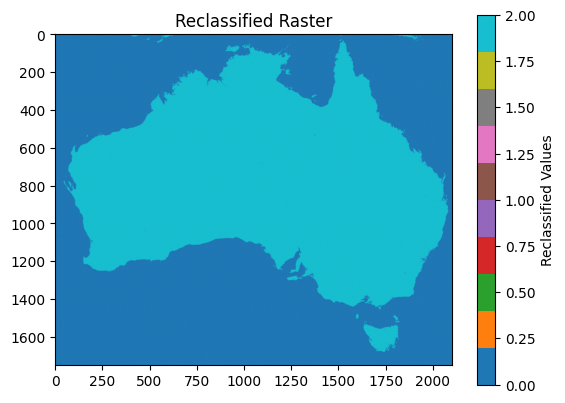

In [ ]:
with rasterio.open('/content/20230101000000_AHI_ANU_LSTv1.4.1_AusSubset.cog.tif') as src:
    data = src.read(1)

# Reclassify: 0-50 -> 1, 51-100 -> 2, >100 -> 3
reclassified = np.digitize(data, bins=[50, 100], right=True)

plt.imshow(reclassified, cmap='tab10')
plt.colorbar(label='Reclassified Values')
plt.title('Reclassified Raster')
plt.show()


In [ ]:
from rasterio.features import shapes
import geopandas as gpd

with rasterio.open('/content/20230101000000_AHI_ANU_LSTv1.4.1_AusSubset.cog.tif') as src:
    data = src.read(1)
    mask = data != src.nodata  # Exclude NoData values

# Generate shapes
shapes_gen = shapes(data, mask=mask, transform=src.transform)

# Convert to GeoDataFrame
polygons = gpd.GeoDataFrame.from_features(
    [{'geometry': geom, 'value': value} for geom, value in shapes_gen],
    crs=src.crs
)

# Save as GeoJSON
polygons.to_file('raster_polygons.geojson', driver='GeoJSON')


KeyError: 'properties'